In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [2]:
dfs4 = pd.read_csv('Data/Solar Data/Solar 4.csv')

In [3]:
dfs4

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2019-06-05 14:00:00,2019,6,5,14,0,Solar4
1,4,0.00,2019-06-05 15:00:00,2019,6,5,15,0,Solar4
2,8,0.00,2019-06-05 16:00:00,2019,6,5,16,0,Solar4
3,12,0.00,2019-06-05 17:00:00,2019,6,5,17,0,Solar4
4,16,0.00,2019-06-05 18:00:00,2019,6,5,18,0,Solar4
...,...,...,...,...,...,...,...,...,...
12341,49364,0.00,2020-10-31 19:00:00,2020,10,31,19,0,Solar4
12342,49368,0.23,2020-10-31 20:00:00,2020,10,31,20,0,Solar4
12343,49372,0.70,2020-10-31 21:00:00,2020,10,31,21,0,Solar4
12344,49376,1.32,2020-10-31 22:00:00,2020,10,31,22,0,Solar4


In [6]:
data = dfs4['series_value'][3000:4000]

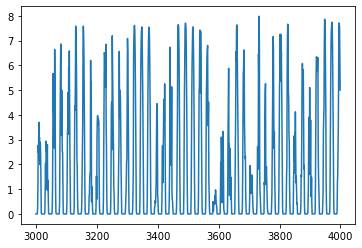

In [7]:
plt.plot(data)

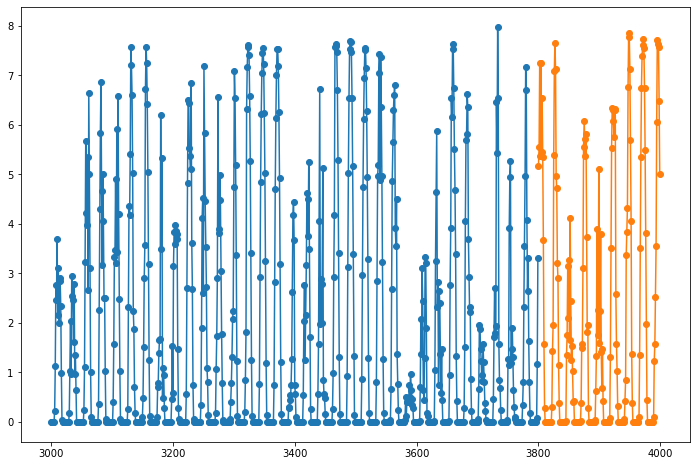

In [8]:
train_size = 0.8

ts = data

split_idx = round(len(data)* train_size)

# Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)

In [9]:
modelactual = auto_arima(train, start_p=0, start_q=0, seasonal=True)
modelactual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -1091.768
Date:                Wed, 28 Sep 2022   AIC                           2199.535
Time:                        18:24:21   BIC                           2237.012
Sample:                             0   HQIC                          2213.932
                                - 800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1168      0.040      2.896      0.004       0.038       0.196
ar.L1          1.7536      0.089     19.795      0.000       1.580       1.927
ar.L2         -0.6922      0.095     -7.270      0.000      -0.879      -0.506
ar.L3         -0.2355      0.049     -4.788      0.000      -0.332      -0.139
ar.L4          0.1299      0.054      2.417      0.016       0.025       0.235
ar.L5         -0.0270      0.042     -0.639      0.523      -0.110       0.056
ma.L1         -0.8111      0.085     -9.508      0.000      -0.978      -0.644
sigma2         0.8946      0.030     29.991      0.000       0.836       0.953
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1080.80
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.36
Prob(H) (two-sided):                  0.31   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
data = train
# define model
my_order = (5, 1, 1)
my_seasonal_order = (5, 1, 1, 24)
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(end=len(test))

In [12]:
yhat

3000    0.000000
3001    0.000000
3002    0.000000
3003    0.000000
3004    0.000000
          ...   
3196    0.065993
3197    0.064716
3198    0.326929
3199    1.615257
3200    3.181868
Name: predicted_mean, Length: 201, dtype: float64

In [35]:
lst = []
for i in range(3030, 3186):
    lst.append(yhat[i])

In [36]:
forecastdf = pd.DataFrame(lst, columns=['forecast']) 

In [15]:
test

3800    5.17
3801    5.55
3802    7.25
3803    5.37
3804    7.25
        ... 
3995    7.71
3996    7.63
3997    7.57
3998    6.47
3999    5.00
Name: series_value, Length: 200, dtype: float64

In [32]:
lst = []
for i in range(3845, 4000):
    lst.append(test[i])

In [33]:
testdfnew = pd.DataFrame(lst, columns=['test']) 

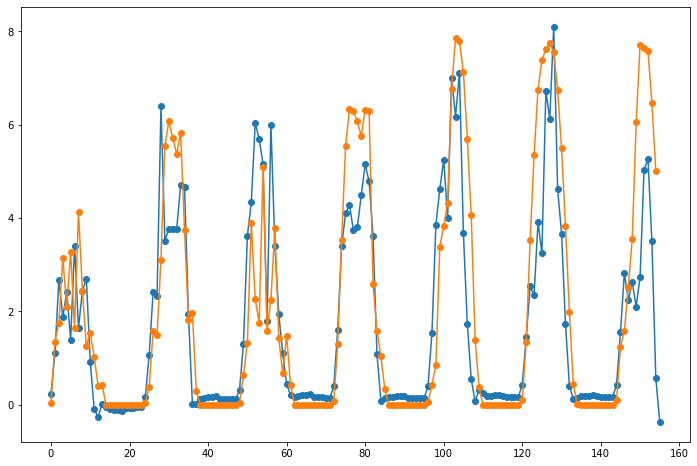

In [37]:
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(forecastdf['forecast'], label='Forecast', **kws)
plt.plot(testdfnew['test'], label='Test', **kws)

In [38]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))


pred = forecastdf['forecast'] 
tst = testdfnew['test']
trn = train

mean_absolute_scaled_error(pred,tst,trn)

1.4775976225690581